# LendingClub Dataset

The aim of this notebook is to show the process of cleanup, EDA, and predictive analysis for the Lending Club loan dataset.

### I) Setting Up

In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")
%pylab inline

/Users/navina/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read csv file as a pandas df
loan_df = pd.read_csv('loan.csv')

### II) Exploratory Questions

1) Understanding the best borrower profile for investors

2) Look at bad vs good loan indicators--home ownership, 

3) Interst rate vs loan amount over time(year and month)

4) Loan grade vs good loan/bad loan

5) applicant pool quality vs interest rates? (increased risk premium to default prone accounts)?

6) default rate vs state

7) numer of loans issued vs type of loan issued vs default rate

8) dti (joint vs individual) vs good/bad loans

9) dti vs loan grade

10) check desc: description of why the borrower needs loan

### III)  EDA and missing record investigation

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_df.shape

(887379, 74)

In [5]:
loan_df = loan_df.replace(['n/a', 'N/A', 'NA', 'na'], np.nan)

In [6]:
# Checking for duplicate entries and missing values
dup_cnt, null_cnt = loan_df.duplicated().sum(), loan_df.isnull().sum().sum()
print("Number of Duplicate entries = %d, Missing entries = %d" % (dup_cnt, null_cnt))
if(loan_df.isnull().sum().sum()): print(loan_df.isnull().sum())

Number of Duplicate entries = 0, Missing entries = 17998494
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51466
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                         

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835913 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [8]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


### IV) Clean Up and Convert Data Types of Variables

In [9]:
# Dropping columns with > 80% missing entries
loan_df = loan_df.dropna(thresh = len(loan_df)*0.2, axis = 1)
loan_df.shape

(887379, 55)

In [10]:
# dropping columns we are certain won't be needed for analysis
# id, member_id - no real predictive power
loan_df = loan_df.drop(['id', 'member_id'], axis = 1)

#### 1) Loan Amount and Funded Amount

In [11]:
# inspecting loan_amnt vs funded_amnt
print((loan_df['loan_amnt'] != loan_df['funded_amnt']).value_counts())

# since the number of people who were granted a different loan amount
# than requested is <1%, ignoring this difference and dropping funded_amnt
loan_df = loan_df.drop('funded_amnt', axis=1)

False    885317
True       2062
dtype: int64


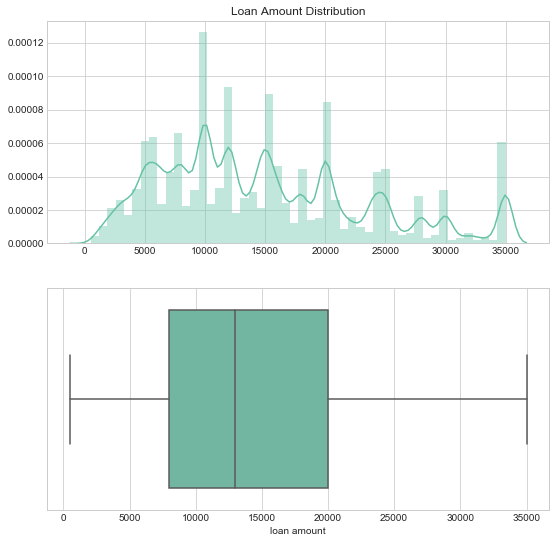

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(9,9))
plt1 = sns.distplot(loan_df['loan_amnt'], ax=ax1)
plt1.set_title("Loan Amount Distribution")
plt1.set(xlabel='')

plt2 = sns.boxplot(loan_df['loan_amnt'], ax=ax2)
plt2.set(xlabel='loan amount')

#### 2) Term

In [13]:
loan_df['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [14]:
# creating dummies for term - 36 months: 1, 60 months:0
# loan_df['term_encoded'] = loan_df['term'].replace([' 36 months',' 60 months'],[1,0])
# loan_df = loan_df.drop('term', axis=1)

In [15]:
loan_df.iloc[:5, 7:15]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan
0,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n
1,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n
2,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n
3,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n
4,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n


#### 3) Employment Title

In [16]:
# Due to high cardinality, 'emp_title' won't be useful for analysis
# no grouping of similar professions is being done
print("The number of unique values in employment title: %d" % (loan_df['emp_title'].nunique()))
# Dropping this column since it won't help in the analysis
loan_df_clean = loan_df.drop('emp_title', axis=1)

The number of unique values in employment title: 299270


#### 4) Employment Length

In [17]:
# unique values
loan_df_clean['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [18]:
# Check for NAs
print('Null values in emp_length: %d' % (loan_df_clean['emp_length'].isnull().sum()))
# Replace na with string 0, since emp_length is of object type
loan_df_clean['emp_length'] = loan_df_clean['emp_length'].fillna(value="0")
# Remove everything other than integers and convert to int
loan_df_clean['emp_length'] = loan_df_clean['emp_length'].replace(to_replace='\D+', value='', regex=True).astype(int)

Null values in emp_length: 44825


#### 5) Home Ownership

In [19]:
print(loan_df_clean['home_ownership'].value_counts())
# remove ambiguous categories - other, none, any
loan_df_clean['home_ownership'] = loan_df_clean['home_ownership'].replace(['ANY', 'OTHER', 'NONE'], NaN)
loan_df_clean = loan_df_clean.dropna(subset=['home_ownership'])


MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64


#### 6) Verification Status

In [20]:
# unique values
# not sure of diff between Verified and Source Verified
# clubbing source verified and verified into one group
print(loan_df_clean['verification_status'].value_counts())
loan_df['verification_status'] = loan_df['verification_status'].replace('Verified','Source Verified')

Source Verified    329535
Verified           290976
Not Verified       266633
Name: verification_status, dtype: int64


#### 7) Issue Date

In [21]:
loan_df_clean['title'].nunique()

63043

In [22]:
# Convert to datetime
loan_df_clean['issue_d'] = pd.to_datetime(loan_df_clean['issue_d'], format='%b-%Y')


In [23]:
loan_df_clean['issue_year'] = loan_df_clean['issue_d'].dt.year

In [24]:
# plt = sns.densityplot(data=loan_df_clean, x='issue_year',y='int_rate', hue = 'grade', alpha=0.6)
# plt.set(xlabel='year', ylabel='interest rate')
# plt.set_title('Interest Rate by Loan Grade')

In [25]:
loan_df_clean = loan_df_clean.drop('issue_year', axis=1)

#### 8) Loan Status

In [26]:
loan_df_clean['loan_status'].value_counts()

Current                                                601772
Fully Paid                                             207572
Charged Off                                             45214
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1957
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       749
Name: loan_status, dtype: int64

In [27]:
# merge 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'
loan_df_clean['loan_status'] =  loan_df_clean['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
# merge 'Charged Off', 'Does not meet the credit policy. Status:Charged Off'
loan_df_clean['loan_status'] =  loan_df_clean['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')

#### Examining third set of columns

In [28]:
loan_df_clean.iloc[:5, 28:46]

,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0
1,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0
2,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0
3,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0
4,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0


#### 9) Payment Plan

In [29]:
loan_df_clean['pymnt_plan'].value_counts()

n    887134
y        10
Name: pymnt_plan, dtype: int64

#### 10) Title

In [30]:
print('Number of unique values in title: %d' % (loan_df_clean.title.nunique()))

Number of unique values in title: 63043


In [31]:
loan_df_clean.title.dtype

dtype('O')

In [32]:
loan_df_clean['title'] = loan_df_clean['title'].astype(str)

In [33]:
# drop payment plan since almost all rows have 'n'
# drop url, title, desc since these aren't useful for analysis
# title, desc - borrower written free text
loan_df_clean = loan_df_clean.drop(['pymnt_plan', 'url', 'title','zip_code'], axis=1)

In [34]:
# after observing that all na values shoudl be zero
loan_df_clean[pd.isnull(loan_df_clean['mths_since_last_delinq'])]
loan_df_clean['mths_since_last_delinq'] = loan_df_clean['mths_since_last_delinq'].fillna(value=0)

#### 11) Open Accounts and Public Records

In [35]:
loan_df_clean['open_acc'].isnull().value_counts()

False    887119
True         25
Name: open_acc, dtype: int64

In [36]:
loan_df_clean['pub_rec'].isnull().value_counts()

False    887119
True         25
Name: pub_rec, dtype: int64

In [37]:
# since pub_rec and open rec could be important features, removing NA rows
loan_df_clean = loan_df_clean.dropna(subset=['open_acc','pub_rec', 'revol_util','collections_12_mths_ex_med'])

In [38]:
loan_df_clean.shape

(886537, 47)

In [39]:
# drop outstanding principal funded by investors,
# since >95% rows have the same values in both cols
print((loan_df_clean.out_prncp_inv == loan_df_clean.out_prncp).value_counts())
loan_df_clean = loan_df_clean.drop('out_prncp_inv', axis=1)

True     832563
False     53974
dtype: int64


In [40]:
print(loan_df_clean.next_pymnt_d.isnull().value_counts())

print(loan_df_clean.mths_since_last_major_derog.isnull().value_counts())

loan_df_clean['mths_since_last_major_derog'] = loan_df_clean['mths_since_last_major_derog'].fillna(value=0)

print(loan_df_clean.policy_code.value_counts())

# drop last_pymnt_d,next_pymnt_d, mths_since_last_major_derog since there are too many NAs
# drop policy_code since all values are the same
loan_df_clean = loan_df_clean.drop(['last_pymnt_d','next_pymnt_d', 'policy_code'], axis=1)

False    634002
True     252535
Name: next_pymnt_d, dtype: int64
True     665013
False    221524
Name: mths_since_last_major_derog, dtype: int64
1.0    886537
Name: policy_code, dtype: int64


In [41]:
# drop last_credit_pull_d since delinquency is captured more accurately in other columns 
loan_df_clean = loan_df_clean.drop(['last_credit_pull_d'], axis=1)

In [42]:
# removing na rows from tot_coll_amt and tot_cur_bal
loan_df_clean = loan_df_clean.dropna(subset=['tot_coll_amt','tot_cur_bal'])

#### 12) Application Type

In [43]:
print(loan_df_clean.application_type.value_counts())

INDIVIDUAL    816121
JOINT            511
Name: application_type, dtype: int64


#### 13) Purpose

In [44]:
# wordcloud
#sns.barplot(loan_df_clean['purpose'], orient='h')

# wordcloud = WordCloud(font_path='Helvetica', background_color='white',max_words=400, random_state=1).generate(' '.join(loan_df_clean['purpose']))

# plt.figure(1,figsize=(8,8))


# plt.title("Loan Purpose")
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")

#### Feature Engineering

In [45]:
# Encode new column (dependent variable) based on loan status
# bad - Default, Charged Off 
# good - Fully Paid
# remove - Late (16-30 days),Late (31-120 days), Current,In Grace Period
loan_df_clean = loan_df_clean[(loan_df_clean.loan_status == 'Fully Paid') | (loan_df_clean.loan_status == 'Charged Off') | (loan_df_clean.loan_status == 'Default')]

loan_df_clean['bad_loan'] = loan_df_clean['loan_status'].replace({'Charged Off': 1,'Default': 1, 'Fully Paid':0})

# drop loan_status
loan_df_clean = loan_df_clean.drop('loan_status', axis=1)

In [46]:
loan_df_clean.bad_loan.value_counts()

0    153869
1     36391
Name: bad_loan, dtype: int64

In [47]:
# Convert earliest_cr_line to datetime
loan_df_clean['earliest_cr_line'] = pd.to_datetime(loan_df_clean['earliest_cr_line'], format='%b-%Y')
# create new column calculating length of credit history (diff between earliest_cr_line and issue_d)
loan_df_clean['length_credit_history'] = loan_df_clean['issue_d'].dt.year - loan_df_clean['earliest_cr_line'].dt.year

# drop earliest_cr_line and issue_d
loan_df_clean = loan_df_clean.drop(['earliest_cr_line', 'issue_d'], axis=1)

In [48]:
loan_df_clean['length_credit_history'].describe()

count    190260.000000
mean         15.725339
std           7.049477
min           3.000000
25%          11.000000
50%          14.000000
75%          19.000000
max          66.000000
Name: length_credit_history, dtype: float64

#### Final Clean Up

In [49]:
loan_df_clean.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'bad_loan', 'length_credit_history'],
      dtype='object')

In [50]:
# drop columns that were generated after the loan was issued - not relevant to analysis
loan_df_clean = loan_df_clean.drop(['funded_amnt_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'tot_coll_amt','out_prncp','recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'], axis=1)

In [51]:
print(loan_df_clean.application_type.value_counts())
# drop the only joint account in the data - outlier
loan_df_clean = loan_df_clean.drop(loan_df_clean.index[loan_df_clean.application_type == 'JOINT'])
# since every application is now individual, drop the column
loan_df_clean = loan_df_clean.drop('application_type', axis=1)

INDIVIDUAL    190259
JOINT              1
Name: application_type, dtype: int64


### Correlation

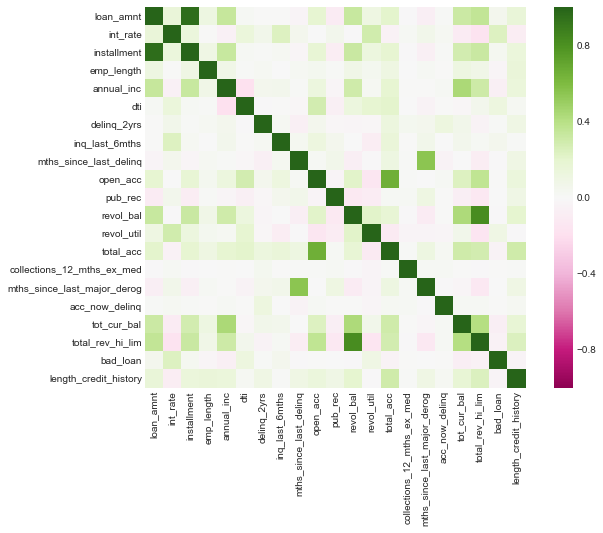

In [52]:
corrmat = loan_df_clean.corr()

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, cmap="PiYG", vmin=-1, vmax=1, square=True) 

In [53]:
corrmat.loc[:,:] = np.tril(corrmat, k=-1)
corrmat = corrmat.stack()
corrmat[(corrmat > 0.55) | (corrmat < -0.55)]

installment       loan_amnt    0.956443
total_acc         open_acc     0.663865
total_rev_hi_lim  revol_bal    0.827292
dtype: float64

In [54]:
# drop redundant/correlated data to address multicollinearity
loan_df_clean = loan_df_clean.drop(['installment','total_acc',
                                    'total_rev_hi_lim'], axis=1)

In [55]:
loan_df_clean.dtypes

loan_amnt                      float64
term                            object
int_rate                       float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
initial_list_status             object
collections_12_mths_ex_med     float64
mths_since_last_major_derog    float64
acc_now_delinq                 float64
tot_cur_bal                    float64
bad_loan                         int64
length_credit_history    

### Exporting csv for D3.js

In [ ]:
# viz_df = loan_df_clean[['loan_amnt','dti','length_credit_history', 'addr_state','annual_inc','bad_loan', 'int_rate']]

In [ ]:
# def loan_process(row):
#     if row <= 10000.0:
#         return '0-10K'
#     elif row > 10000.0 and row <= 20000.0:
#         return '10K-20K' 
#     elif row > 20000.0 and row <= 30000.0:
#         return '20K-30K' 
#     else:
#         return '30K-35K'

In [ ]:
# viz_df['loan_amount'] = viz_df['loan_amnt'].apply(loan_process)
# viz_df = viz_df.drop('loan_amnt', axis=1)

In [ ]:
# viz_df['dti'] = viz_df['dti'].map(lambda x: '0-10%' if x <= 10 else ('10%-20%' if x >10<=20 else '>20%'))
# viz_df['length_credit_history'] = viz_df['length_credit_history'].map(lambda x: '0-10 years' if x <=10 else ('10-20 years' if x>10<=20 else '> 20 years'))
# viz_df['annual_inc'] = viz_df['annual_inc'].map(lambda x: '<= 65K' if x <=65000 else '>65K')

In [ ]:
# def conv_interest(row):
#     if row <= 7:
#         return '5%-7%'
#     elif row > 7 and row <= 9: 
#         return '7%-9%'
#     elif row > 9 and row <= 11:
#         return '9%-11%'
#     elif row > 11 and row <= 13:
#         return '11%-13%'
#     elif row > 13 and row <= 15:
#         return '13%-15%'
#     elif row > 15 and row <= 17:
#         return '15%-17%'
#     elif row > 17 and row <= 19:
#         return '17%-19%'
#     elif row > 19 and row <= 21:
#         return '19%-21%'
#     elif row > 21 and row <= 23:
#         return '21%-23%'
#     elif row > 23 and row <= 25:
#         return '23%-25%'
#     else: 
#         return '>25%'

In [ ]:
# viz_df['int_rate'] = viz_df['int_rate'].apply(conv_interest)

In [ ]:
# viz_df['risky_applicant'] = viz_df['bad_loan'].map(lambda x: 'Yes' if x == 1 else 'No')
# viz_df = viz_df.drop('bad_loan', axis=1)

In [ ]:
#viz_df

In [ ]:
#viz_df.to_csv('d3_loan.csv')

### Visualization

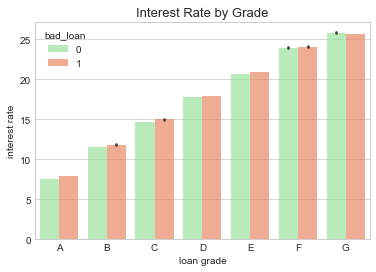

In [56]:
loan_df_clean = loan_df_clean.sort_values(by='grade')

fig1 = sns.barplot(x="grade", y="int_rate", hue="bad_loan", data=loan_df_clean, palette=['lightgreen','coral'], alpha=0.7)
fig1.set(xlabel = 'loan grade', ylabel ='interest rate')
fig1.set_title('Interest Rate by Grade', fontsize=13)

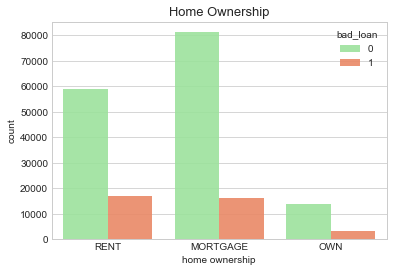

In [57]:
fig2 = sns.countplot(x='home_ownership', data=loan_df_clean, hue='bad_loan', palette=['lightgreen','coral'], alpha=0.9)
fig2.set(xlabel = 'home ownership')
fig2.set_title('Home Ownership', fontsize=13)

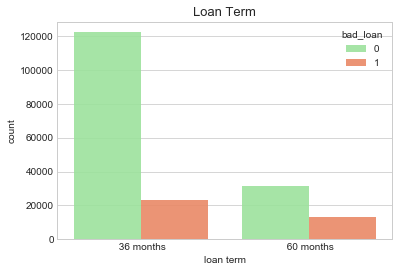

In [58]:
fig3 = sns.countplot(x='term', data=loan_df_clean, hue='bad_loan', palette=['lightgreen','coral'], alpha=0.9)
fig3.set(xlabel = 'loan term')
fig3.set_title('Loan Term', fontsize=13)

In [63]:
#loan_df_clean['bad_loan'] = loan_df_clean['bad_loan'].replace([0,1],['False', 'True'])
loan_df_clean['bad_loan'] = loan_df_clean['bad_loan'].replace(['False','True'],[0, 1])

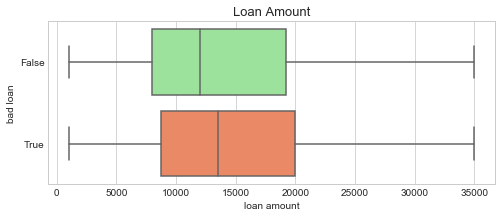

In [61]:
plt.figure(1, figsize=(8, 3))
fig4 = sns.boxplot(x="loan_amnt", y="bad_loan",  data=loan_df_clean, palette=['lightgreen','coral'])
fig4.set(xlabel = 'loan amount', ylabel='bad loan')
fig4.set_title('Loan Amount', fontsize=13)

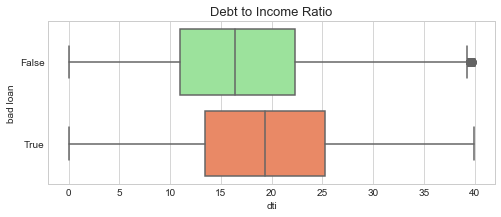

In [62]:
plt.figure(1, figsize=(8, 3))
fig5 = sns.boxplot(x="dti", y="bad_loan",  data=loan_df_clean, palette=['lightgreen','coral'])
fig5.set(xlabel = 'dti', ylabel='bad loan')
fig5.set_title('Debt to Income Ratio', fontsize=13)

### Predicting Bad Loans

In [64]:
# convert all remaining categorical variables to dummy variables
loan_df_clean = pd.get_dummies(loan_df_clean)
print(loan_df_clean.info())
print(loan_df_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190259 entries, 318462 to 637733
Columns: 133 entries, loan_amnt to initial_list_status_w
dtypes: float64(15), int64(3), uint8(115)
memory usage: 53.4 MB
None
(190259, 133)


In [65]:
# create a Python list of feature names
# Get all columns from dataframe
feature_cols = loan_df_clean.columns.tolist()
# Filter columns to remove the ones not needed - retain only numeric varaibles
feature_cols  = [c for c in feature_cols if c not in ['bad_loan']]
# use the list to select a subset of the original DataFrame
X = loan_df_clean[feature_cols]
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(190259, 132)


In [66]:
# select a Series from the DataFrame
y = loan_df_clean['bad_loan']
# print the first 5 values
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(190259,)


#### Splitting X and y into training and testing sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(142694, 132)
(142694,)
(47565, 132)
(47565,)


#### Comparing Logistic Regression, Gradient Boosting, Ramdom Forest Classifiers

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [69]:
# Compare different classifer models
def compare_classifier_models(X_train, y_train, X_test, y_test, model_dict):
        cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score']
        model_results = pd.DataFrame(columns = cols)
        conf_matrix = dict()
        row = dict.fromkeys(cols)
        for model_name, model in zip(model_dict.keys(), model_dict.values()):
            print('Running {model}:'.format(model=model_name))
            model.fit(X_train, y_train)
            y_pred, y_prob = model.predict(X_test), model.predict_proba(X_test)[:,1]  
            
            row.update({'model': model_name, 
                        'roc_auc_score' : metrics.roc_auc_score(y_test, y_prob),
                        'precision_score': metrics.precision_score(y_test, y_pred),
                        'recall_score': metrics.recall_score(y_test, y_pred),
                        
                        })           
            model_results = model_results.append(row, ignore_index=True)
    
            # Compute the confusion matrx
            conf_matrix[model_name] = pd.crosstab(y_test, y_pred, rownames=['Actual Value'], 
                                                  colnames= ['Predicted Outcome'], margins=False)
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob, 
                                                     drop_intermediate = False, pos_label = 1)

            # Plot this model
            plt.figure(1, figsize=(6, 5))
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.plot(fpr, tpr, label = model_name )
            plt.legend(loc=2, prop={'size':11})
        
        plt.plot([0,1],[0,1], color = 'black')
        return model_results, conf_matrix

Running LogisticRegression:
Running RandomForestClassifier:
Running GradientBoosting:


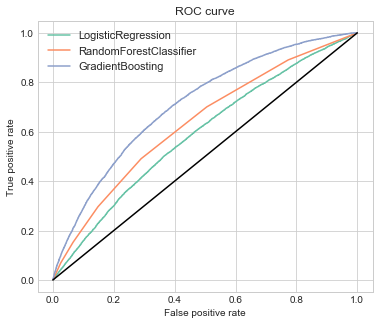

In [70]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
    'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100,
                                                   max_features = 0.3, random_state=10),
}
models_report, conf_matrix = compare_classifier_models(X_train, y_train, X_test, y_test, models)

In [71]:
models_report

,model,roc_auc_score,precision_score,recall_score
0,LogisticRegression,0.589972,0.000000,0.000000
1,RandomForestClassifier,0.635292,0.384663,0.068693
2,GradientBoosting,0.711365,0.513216,0.051882


In [72]:
cm = conf_matrix['GradientBoosting']

In [73]:
cm

Predicted Outcome,0,1
Actual Value,,
0,38141,442
1,8516,466


In [74]:
y_test.value_counts()

0    38583
1     8982
Name: bad_loan, dtype: int64

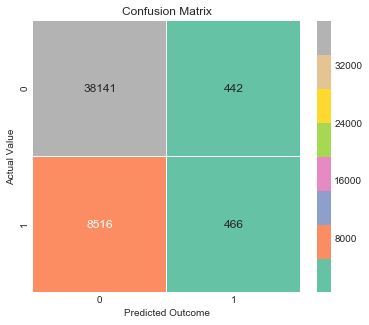

In [75]:
plt.figure(figsize=(6,5))
plt.title('Confusion Matrix')
df = pd.DataFrame(cm)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(cm, cmap='Set2', linewidths=0.5, annot=True, fmt='d', annot_kws={"size": 12})

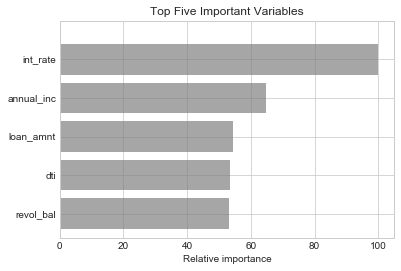

In [76]:
# plt.subplot(1, 2, 1)
# plt.title('Deviance over iterations')
# plt.plot(np.arange(Iterations) + 1, est.train_score_, 'dodgerblue',
#          label='Training Set Deviance', alpha=.6)
# plt.plot(np.arange(Iterations) + 1, test_score, 'firebrick',
#          label='Test Set Deviance', alpha=.6)
# plt.legend(loc='upper right')
# plt.xlabel('Boosting Iterations')
# plt.ylabel('Deviance')


# plt.subplot(1, 2, 2,)
# Top Ten
feature_importance = models['GradientBoosting'].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-5:]
plt.barh(np.arange(5), feature_importance[indices],color='grey', alpha=0.7)
plt.yticks(np.arange(5 + 0.25), np.array(feature_cols)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Five Important Variables')

In [77]:
features = list(zip(feature_cols, models['GradientBoosting'].feature_importances_))
sorted(features, key=lambda x: x[1])[-10:]

[('emp_length', 0.028724515500016687),
 ('open_acc', 0.03056616636925602),
 ('length_credit_history', 0.04218886843016581),
 ('tot_cur_bal', 0.057070939970755401),
 ('revol_util', 0.067747167147236623),
 ('revol_bal', 0.068553005865613581),
 ('dti', 0.069001667610805881),
 ('loan_amnt', 0.070087429723662581),
 ('annual_inc', 0.083638520354202481),
 ('int_rate', 0.12899738940379588)]